In [1]:
import os
from ctrace.constraint import load_graph, find_contours
from contact_tracing import PQ
from contact_tracing import *
from ctrace.constraint import ProbMinExposed, ProbMinExposedMIP
from ctrace.draw import *
os.getcwd()

'/home/zach/Documents/prog/research/ContactTracing/ctrace'

In [2]:
LOADING = False
np.random.seed(42)

In [3]:
# Setup graph and infected sets
if LOADING:
    G = load_graph("montgomery")
    # Randomly sample 5% of infected
    N = G.number_of_nodes()
    num_infected = int(N * 0.05)
    I = np.random.choice(N, num_infected, replace=False)

    # Set K value
    K = int(0.8 * len(I))
else:
    G = nx.balanced_tree(3, 3)
    I = {0, 1}

    # Set K value
    K = 3

# Find contours
contour1, contour2 = find_contours(G, I)

# Find the infected probabilities
p1, q = PQ(G, I)

In [4]:
K

3

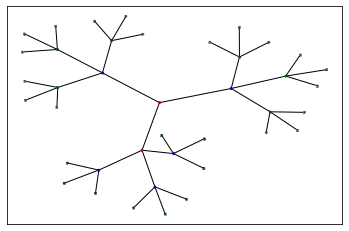

In [5]:
if not LOADING:
    draw_contours(G, I, contour1, contour2)

In [6]:
print(f"K: {K}")
print(f"I: {I}")

K: 3
I: {0, 1}


In [7]:
constraintMIP = ProbMinExposedMIP.from_dataframe(G, I, contour1, contour2, p1, q, K)
constraintNone = ProbMinExposedMIP.from_dataframe(G, I, contour1, contour2, p1, q, 0)

In [8]:
constraintMIP.solve_lp()
constraintNone.solve_lp()

In [9]:
constraintMIP.getVariables()

array([1., 1., 0., 0., 1.])

In [10]:
quarantined = constraintMIP.quarantined_solution
saved = constraintMIP.saved_solution

print(quarantined)
print(saved)

{2: 1.0, 3: 1.0, 4: 0.0, 5: 0.0, 6: 1.0}
{7: 1.0, 8: 1.0, 9: 1.0, 10: 1.0, 11: 1.0, 12: 1.0, 13: 0.8, 14: 0.8, 15: 0.8, 16: 0.85, 17: 0.8, 18: 0.75, 19: 1.0, 20: 1.0, 21: 1.0}


/home/zach/Documents/prog/research/ContactTracing/ctrace/draw.py:74: RuntimeWarning: divide by zero encountered in log
  fill[i] = yellow(-np.log(1 - saved[i]))


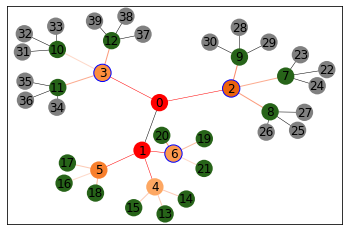

In [11]:
# Solution Visualization
draw_prob(G, I, contour1, contour2, quarantined, saved, constraintMIP.p1, constraintMIP.q)

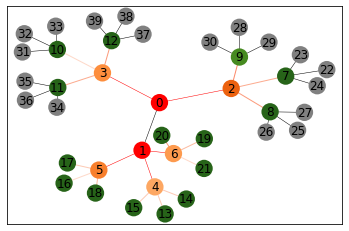

In [12]:
draw_prob(G, I,
          contour1,
          contour2,
          constraintNone.quarantined_solution,
          constraintNone.saved_solution,
          constraintNone.p1,
          constraintNone.q)

In [13]:
constraintNone.saved_solution

{7: 0.7,
 8: 0.65,
 9: 0.6000000000000001,
 10: 0.85,
 11: 0.7,
 12: 0.65,
 13: 0.8,
 14: 0.8,
 15: 0.8,
 16: 0.85,
 17: 0.8,
 18: 0.75,
 19: 0.75,
 20: 0.65,
 21: 0.85}

In [14]:
saved

{7: 1.0,
 8: 1.0,
 9: 1.0,
 10: 1.0,
 11: 1.0,
 12: 1.0,
 13: 0.8,
 14: 0.8,
 15: 0.8,
 16: 0.85,
 17: 0.8,
 18: 0.75,
 19: 1.0,
 20: 1.0,
 21: 1.0}

In [17]:
[-np.log(1 - x) for _, x in saved.items()]

<ipython-input-17-a4b4a972f945>:1: RuntimeWarning: divide by zero encountered in log
  [-np.log(1 -x) for _, x in saved.items()]


[inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 1.6094379124341005,
 1.6094379124341005,
 1.6094379124341005,
 1.897119984885881,
 1.6094379124341005,
 1.3862943611198906,
 inf,
 inf,
 inf]